In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
# from sklearn.metrics import f1_score
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# from sklearn.metrics import classification_report
from sklearn import metrics
# from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [4]:
companies = pd.read_excel("dataset.xlsx",sheet_name="Companies",header=0,index_col=False,keep_default_na=True)

In [5]:
rounds = pd.read_excel("dataset.xlsx",sheet_name="Rounds",header=0,index_col=False,keep_default_na=True)
investments = pd.read_excel("dataset.xlsx",sheet_name="Investments",header=0,index_col=False,keep_default_na=True)
acquisitions = pd.read_excel("dataset.xlsx",sheet_name="Acquisitions",header=0,index_col=False,keep_default_na=True)
additions = pd.read_excel("dataset.xlsx",sheet_name="Additions",header=0,index_col=False,keep_default_na=True)

In [6]:
companies.head()

permalink                name  \
0            /organization/waywire            #waywire   
1  /organization/tv-communications  &TV Communications   
2    /organization/rock-your-paper   'Rock' Your Paper   
3   /organization/in-touch-network   (In)Touch Network   
4   /organization/r-ranch-and-mine  -R- Ranch and Mine   

                    homepage_url  \
0         http://www.waywire.com   
1          http://enjoyandtv.com   
2   http://www.rockyourpaper.org   
3  http://www.InTouchNetwork.com   
4                            NaN   

                                       category_list       market  \
0         |Entertainment|Politics|Social Media|News|         News   
1                                            |Games|        Games   
2                             |Publishing|Education|   Publishing   
3  |Electronics|Guides|Coffee|Restaurants|Music|i...  Electronics   
4                      |Tourism|Entertainment|Games|      Tourism   

   funding_total_usd     status country_code state_code         region  \
0            1750000   acquired          USA         NY  New York City   
1            4000000  operating          USA         CA    Los Angeles   
2              40000  operating          EST        NaN        Tallinn   
3            1500000  operating          GBR        NaN         London   
4              60000  operating          USA         TX         Dallas   

          city  funding_rounds           founded_at founded_month  \
0     New York               1  2012-06-01 00:00:00       2012-06   
1  Los Angeles               2                  NaN           NaN   
2      Tallinn               1  2012-10-26 00:00:00       2012-10   
3       London               1  2011-04-01 00:00:00       2011-04   
4   Fort Worth               2  2014-01-01 00:00:00       2014-01   

  founded_quarter  founded_year     first_funding_at      last_funding_at  
0         2012-Q2        2012.0  2012-06-30 00:00:00  2012-06-30 00:00:00  
1             NaN           NaN  2010-06-04 00:00:00  2010-09-23 00:00:00  
2         2012-Q4        2012.0  2012-08-09 00:00:00  2012-08-09 00:00:00  
3         2011-Q2        2011.0  2011-04-01 00:00:00  2011-04-01 00:00:00  
4         2014-Q1        2014.0  2014-08-17 00:00:00  2014-09-26 00:00:00

In [7]:
rounds.head()

company_permalink        company_name  \
0            /organization/waywire            #waywire   
1  /organization/tv-communications  &TV Communications   
2  /organization/tv-communications  &TV Communications   
3    /organization/rock-your-paper   'Rock' Your Paper   
4   /organization/in-touch-network   (In)Touch Network   

                               company_category_list company_market  \
0         |Entertainment|Politics|Social Media|News|           News   
1                                            |Games|          Games   
2                                            |Games|          Games   
3                             |Publishing|Education|     Publishing   
4  |Electronics|Guides|Coffee|Restaurants|Music|i...    Electronics   

  company_country_code company_state_code company_region company_city  \
0                  USA                 NY  New York City     New York   
1                  USA                 CA    Los Angeles  Los Angeles   
2                  USA                 CA    Los Angeles  Los Angeles   
3                  EST                NaN        Tallinn      Tallinn   
4                  GBR                NaN         London       London   

                           funding_round_permalink funding_round_type  \
0  /funding-round/cc409188fa2b63482bd9008f682c2efa               seed   
1  /funding-round/59a3669a64e39360c2b939300bcda162            venture   
2  /funding-round/86d22afc65107b6941e6c43c671ecbb8            venture   
3  /funding-round/f06b420775f7cb6c1541a9db526534bb               seed   
4  /funding-round/33c3f135f05d7b734b8d7b7c8ae82647               seed   

  funding_round_code            funded_at funded_month funded_quarter  \
0                NaN  2012-06-30 00:00:00      2012-06        2012-Q2   
1                NaN  2010-09-23 00:00:00      2010-09        2010-Q3   
2                NaN  2010-06-04 00:00:00      2010-06        2010-Q2   
3                NaN  2012-08-09 00:00:00      2012-08        2012-Q3   
4                NaN  2011-04-01 00:00:00      2011-04        2011-Q2   

   funded_year  raised_amount_usd  
0       2012.0          1750000.0  
1       2010.0          3000000.0  
2       2010.0          1000000.0  
3       2012.0            40000.0  
4       2011.0          1500000.0

In [8]:
investments.head()

company_permalink           company_name  \
0         /organization/test-company-3           test company   
1  /organization/andrewburnett-com-ltd  AndrewBurnett.com Ltd   
2               /organization/abo-data               ABO Data   
3               /organization/abo-data               ABO Data   
4                   /organization/ikro                   Ikro   

                               company_category_list       company_market  \
0                                                NaN                  NaN   
1  |Internet|SEO|Services|Public Relations|Social...             Internet   
2                              |Enterprise Software|  Enterprise Software   
3                              |Enterprise Software|  Enterprise Software   
4                                                NaN                  NaN   

  company_country_code company_state_code company_region company_city  \
0                  ARE                NaN          Dubai        Dubai   
1                  GBR                NaN      Edinburgh    Edinburgh   
2                  USA                 TX     TX - Other        Italy   
3                  USA                 TX     TX - Other        Italy   
4                  BRA                NaN    BRA - Other       Canoas   

                             investor_permalink  \
0                      /person/jamessss-bondddd   
1                            /organization/ekaf   
2                       /person/antonio-murroni   
3                       /person/filippo-murroni   
4  /organization/crp-companhia-de-participacoes   

                      investor_name  ... investor_region investor_city  \
0                  jamessss bondddd  ...             NaN           NaN   
1                              Ekaf  ...             NaN           NaN   
2                   ANTONIO MURRONI  ...             NaN           NaN   
3                   FILIPPO Murroni  ...             NaN           NaN   
4  CRP Companhia de Participações  ...             NaN           NaN   

                           funding_round_permalink funding_round_type  \
0  /funding-round/c308019016ead7afb2a1d117018eb6fc               seed   
1  /funding-round/14fe2864e02d0f15ddc3ec8eacdc8e1b               seed   
2  /funding-round/809e211b969c3f66440fc15ffcd29385               seed   
3  /funding-round/809e211b969c3f66440fc15ffcd29385               seed   
4  /funding-round/46c353a8249170cc4b6ab89a522fefdc            venture   

  funding_round_code  funded_at funded_month funded_quarter funded_year  \
0                NaN 1921-09-01      1921-09        1921-Q3        1921   
1                NaN 1974-01-01      1974-01        1974-Q1        1974   
2                NaN 1979-01-01      1979-01        1979-Q1        1979   
3                NaN 1979-01-01      1979-01        1979-Q1        1979   
4                  A 1982-06-01      1982-06        1982-Q2        1982   

  raised_amount_usd  
0            1000.0  
1               NaN  
2         1000000.0  
3         1000000.0  
4          724000.0  

[5 rows x 24 columns]

In [9]:
acquisitions.head()

company_permalink    company_name  \
0            /organization/waywire        #waywire   
1      /organization/fluff-friends  (fluff)Friends   
2                /organization/red           (RED)   
3  /organization/vandaele-holdings               .   
4        /organization/co-internet             .CO   

                        company_category_list company_market  \
0  |Entertainment|Politics|Social Media|News|           News   
1                                         NaN            NaN   
2                                |Nonprofits|     Nonprofits   
3                                         NaN            NaN   
4            |Registrars|Domains|Curated Web|     Registrars   

  company_country_code company_state_code company_region company_city  \
0                  USA                 NY  New York City     New York   
1                  NaN                NaN            NaN          NaN   
2                  USA                 NY  New York City     New York   
3                  NaN                NaN            NaN          NaN   
4                  USA                 FL          Miami        Miami   

                           acquirer_permalink                 acquirer_name  \
0                       /organization/magnify              Waywire Networks   
1         /organization/social-gaming-network   SGN (Social Gaming Network)   
2  /organization/nationstar-mortgage-holdings  Nationstar Mortgage Holdings   
3                          /organization/hi7e                          HI7E   
4                       /organization/neustar                       Neustar   

   ... acquirer_country_code acquirer_state_code   acquirer_region  \
0  ...                   USA                  NY     New York City   
1  ...                   USA                  CA       Los Angeles   
2  ...                   USA                  TX            Dallas   
3  ...                   USA                  FL      Palm Beaches   
4  ...                   USA                  VA  Washington, D.C.   

     acquirer_city          acquired_at acquired_month acquired_quarter  \
0         New York  2013-10-17 00:00:00        2013-10          2013-Q4   
1    Beverly Hills  2008-09-16 00:00:00        2008-09          2008-Q3   
2       Lewisville  2014-05-08 00:00:00        2014-05          2014-Q2   
3  West Palm Beach  2011-01-01 00:00:00        2011-01          2011-Q1   
4         Sterling  2014-03-20 00:00:00        2014-03          2014-Q1   

  acquired_year price_amount  price_currency_code  
0        2013.0          NaN                  USD  
1        2008.0          NaN                  USD  
2        2014.0   18000000.0                  USD  
3        2011.0          NaN                  USD  
4        2014.0  109000000.0                  USD  

[5 rows x 22 columns]

In [10]:
additions.head()

content month_str quarter_str  year_str  value
0  Profiles: Organizations   2007-05     2007-Q2      2007     14
1  Profiles: Organizations   2007-06     2007-Q2      2007     96
2  Profiles: Organizations   2007-07     2007-Q3      2007    259
3  Profiles: Organizations   2007-08     2007-Q3      2007    522
4  Profiles: Organizations   2007-09     2007-Q3      2007    219

In [11]:
investments.sort_values(['company_permalink', 'funded_month'], inplace=True)

In [13]:
# Investment round summary
grouped_investments = investments.groupby('funding_round_type')
grouped_investments['raised_amount_usd'].describe(include='all')

count          mean           std        min  \
funding_round_type                                                     
angel                  3998.0  1.106030e+06  2.364456e+06        0.0   
convertible_note        446.0  1.067083e+06  1.036196e+06    12955.0   
debt_financing         1462.0  2.148835e+07  5.878093e+07    13000.0   
equity_crowdfunding      80.0  5.992685e+05  1.191102e+06    15826.0   
grant                   695.0  5.693933e+06  3.762390e+07     1000.0   
post_ipo_debt            32.0  3.739191e+08  1.043377e+09  3500000.0   
post_ipo_equity         120.0  3.079109e+08  7.159013e+08       77.0   
private_equity         1945.0  7.642185e+07  1.365266e+08        0.0   
product_crowdfunding     18.0  1.241036e+06  1.970453e+06   132599.0   
secondary_market         20.0  5.602762e+07  5.532281e+07   210000.0   
seed                  23942.0  1.076982e+06  1.356766e+06        0.0   
undisclosed            1333.0  6.221430e+06  1.690600e+07        0.0   
venture               67064.0  1.502847e+07  3.022152e+07        0.0   

                             25%         50%           75%           max  
funding_round_type                                                        
angel                   304856.0    690000.0  1.200000e+06  6.359026e+07  
convertible_note        250000.0    900000.0  1.500000e+06  1.000000e+07  
debt_financing         1400000.0   4500000.0  1.500000e+07  7.500000e+08  
equity_crowdfunding      77015.0    160230.5  7.480000e+05  7.000000e+06  
grant                    50000.0    237280.0  1.557626e+06  7.500000e+08  
post_ipo_debt         25000000.0  48000000.0  1.036542e+08  5.800000e+09  
post_ipo_equity       10000000.0  26000000.0  1.059000e+08  3.200000e+09  
private_equity        13500000.0  50000000.0  1.000000e+08  2.600000e+09  
product_crowdfunding    311005.0    405329.0  1.576085e+06  8.600000e+06  
secondary_market      17600000.0  60000000.0  6.656250e+07  2.000000e+08  
seed                    185750.0    800000.0  1.500000e+06  1.000000e+08  
undisclosed             500000.0   1752714.0  5.831219e+06  2.924328e+08  
venture                3912490.0   8500000.0  1.759245e+07  1.200000e+09

In [14]:
rounds['funding_round_type'].value_counts()

venture                 41742
seed                    21036
debt_financing           5692
angel                    4443
undisclosed              3871
equity_crowdfunding      2256
private_equity           1828
grant                    1476
convertible_note          759
post_ipo_equity           395
product_crowdfunding      235
post_ipo_debt              82
secondary_market           55
Name: funding_round_type, dtype: int64

In [15]:
investments['funding_round_type'].value_counts()

venture                 70615
seed                    29272
angel                    4894
undisclosed              4479
private_equity           2128
debt_financing           1541
grant                     721
convertible_note          547
post_ipo_equity           126
equity_crowdfunding        80
secondary_market           53
post_ipo_debt              32
product_crowdfunding       18
Name: funding_round_type, dtype: int64

## Distribution of amount raised by fund type

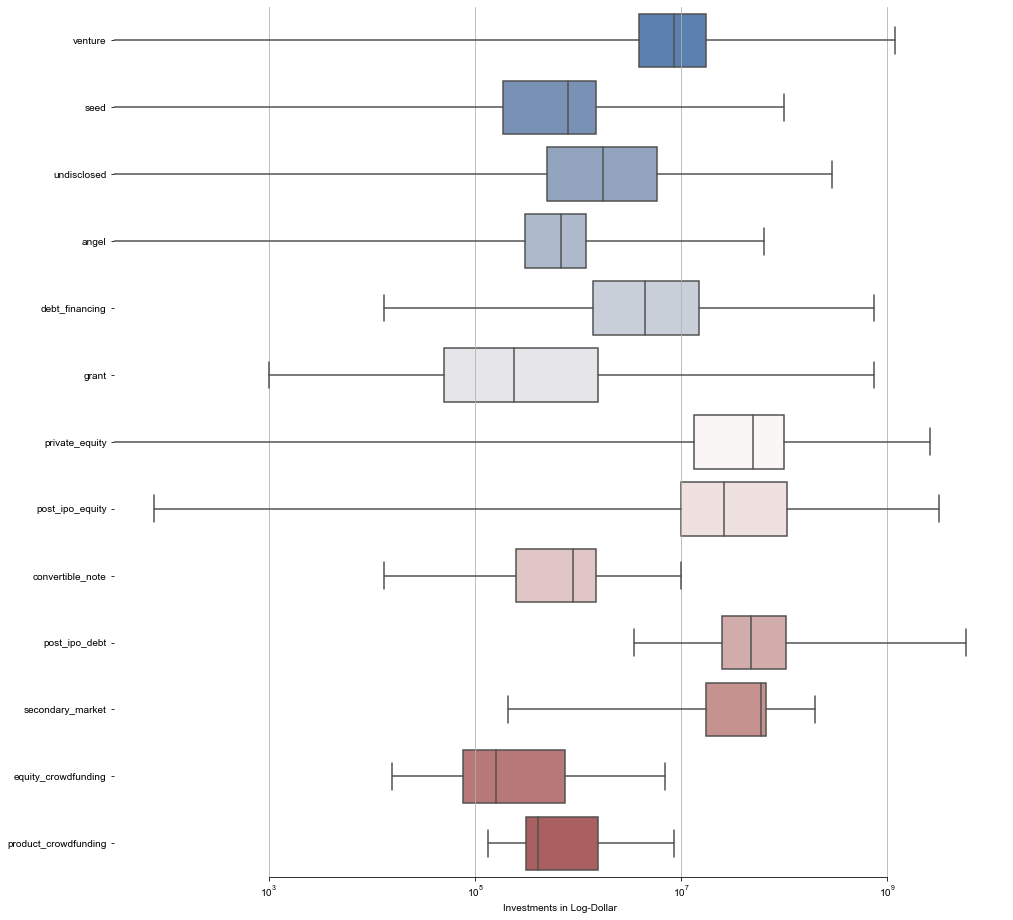

In [16]:
f, ax = plt.subplots(figsize=(16, 16))
ax.set_xscale("log")

sns.set(style="ticks")
sns.boxplot(y='funding_round_type', x='raised_amount_usd', 
            data=investments, palette="vlag", whis=np.inf)

ax.set(ylabel="", xlabel="Investments in Log-Dollar")
ax.xaxis.grid(True)
sns.despine(trim=True, left=True)

# Lets try to predict if a company is going to get acquired

In [17]:
companies['status'].value_counts()

operating    41829
acquired      3692
closed        2603
Name: status, dtype: int64

In [18]:
companies.shape

(49438, 18)

In [19]:
acquisitions.shape

(13070, 22)

In [20]:
companies.isnull().sum()

permalink                0
name                     1
homepage_url          3449
category_list         3961
market                3968
funding_total_usd        0
status                1314
country_code          5273
state_code           19277
region                5273
city                  6116
funding_rounds           0
founded_at           10884
founded_month        10956
founded_quarter      10956
founded_year         10956
first_funding_at         0
last_funding_at          0
dtype: int64

In [23]:
rounds.columns

Index(['company_permalink', 'company_name', 'company_category_list',
       'company_market', 'company_country_code', 'company_state_code',
       'company_region', 'company_city', 'funding_round_permalink',
       'funding_round_type', 'funding_round_code', 'funded_at', 'funded_month',
       'funded_quarter', 'funded_year', 'raised_amount_usd'],
      dtype='object')

In [24]:
rounds['ipo'] = np.where(rounds['funding_round_type'].isin(['post_ipo_equity','post_ipo_equity','secondary_market']),1,0)

In [35]:
groupRounds = rounds.groupby(by='company_permalink',as_index=False).ipo.max()
investments['ipo'] = np.where(investments['funding_round_type'].isin(['post_ipo_equity','post_ipo_equity','secondary_market']),1,0)
groupInvestments = investments.groupby(by='company_permalink',as_index=False).ipo.max()
groupInvestments.shape

(32335, 2)

In [39]:
ipo = pd.concat([groupRounds, groupInvestments], axis=0)
ipo.shape

(81762, 2)

In [41]:
ipo.ipo.value_counts()

0    81299
1      463
Name: ipo, dtype: int64

In [42]:
companies.shape

(49438, 18)

In [49]:
companies.reset_index(drop=True,inplace=True)
ipo.reset_index(drop=True,inplace=True)
companiestry = pd.merge(companies, ipo, how='left',left_on='permalink',right_on='company_permalink')
companiestry.shape

(81767, 20)

In [544]:
acqDates = acquisitions[['company_permalink','acquired_at']].copy()

In [545]:
comWithAcqDates = pd.merge(left=companies, right=acqDates, how='left', left_on='permalink', right_on='company_permalink')

In [546]:
comWithAcqDates.head()

permalink                name  \
0            /organization/waywire            #waywire   
1  /organization/tv-communications  &TV Communications   
2    /organization/rock-your-paper   'Rock' Your Paper   
3   /organization/in-touch-network   (In)Touch Network   
4   /organization/r-ranch-and-mine  -R- Ranch and Mine   

                    homepage_url  \
0         http://www.waywire.com   
1          http://enjoyandtv.com   
2   http://www.rockyourpaper.org   
3  http://www.InTouchNetwork.com   
4                            NaN   

                                       category_list       market  \
0         |Entertainment|Politics|Social Media|News|         News   
1                                            |Games|        Games   
2                             |Publishing|Education|   Publishing   
3  |Electronics|Guides|Coffee|Restaurants|Music|i...  Electronics   
4                      |Tourism|Entertainment|Games|      Tourism   

   funding_total_usd     status country_code state_code         region  \
0            1750000   acquired          USA         NY  New York City   
1            4000000  operating          USA         CA    Los Angeles   
2              40000  operating          EST        NaN        Tallinn   
3            1500000  operating          GBR        NaN         London   
4              60000  operating          USA         TX         Dallas   

          city  funding_rounds           founded_at founded_month  \
0     New York               1  2012-06-01 00:00:00       2012-06   
1  Los Angeles               2                  NaN           NaN   
2      Tallinn               1  2012-10-26 00:00:00       2012-10   
3       London               1  2011-04-01 00:00:00       2011-04   
4   Fort Worth               2  2014-01-01 00:00:00       2014-01   

  founded_quarter  founded_year     first_funding_at      last_funding_at  \
0         2012-Q2        2012.0  2012-06-30 00:00:00  2012-06-30 00:00:00   
1             NaN           NaN  2010-06-04 00:00:00  2010-09-23 00:00:00   
2         2012-Q4        2012.0  2012-08-09 00:00:00  2012-08-09 00:00:00   
3         2011-Q2        2011.0  2011-04-01 00:00:00  2011-04-01 00:00:00   
4         2014-Q1        2014.0  2014-08-17 00:00:00  2014-09-26 00:00:00   

       company_permalink          acquired_at  
0  /organization/waywire  2013-10-17 00:00:00  
1                    NaN                  NaN  
2                    NaN                  NaN  
3                    NaN                  NaN  
4                    NaN                  NaN

In [547]:
comWithAcqDates[(comWithAcqDates.status == 'acquired') & (comWithAcqDates.acquired_at.isna())]

permalink                         name  \
5027          /organization/big-fish-games                     Big Fish   
13790              /organization/entrustet                    Entrustet   
19593              /organization/hydrobolt                    Hydrobolt   
26046             /organization/medistream                   MediStream   
37904  /organization/social-gaming-network  SGN (Social Gaming Network)   
42242              /organization/teach-com                    Teach.com   
48996                /organization/zao-com                      Zao.com   

                      homepage_url  \
5027   http://www.bigfishgames.com   
13790     http://www.entrustet.com   
19593   http://www.hydrobolt.co.uk   
26046       http://medistreams.com   
37904           http://www.sgn.com   
42242            http://teach.com/   
48996           http://www.zao.com   

                                           category_list             market  \
5027   |Mobile|Video Streaming|Gambling|Video Games|E...              Games   
13790                                      |Curated Web|        Curated Web   
19593                                                NaN                NaN   
26046  |Medical|Information Services|Information Tech...            Medical   
37904                                            |Games|              Games   
42242                                        |Education|          Education   
48996                   |Social Recruiting|Social Media|  Social Recruiting   

       funding_total_usd    status country_code state_code         region  \
5027            95244796  acquired          USA         WA        Seattle   
13790              40000  acquired          USA         WI        Madison   
19593                  0  acquired          GBR        NaN  Wolverhampton   
26046                  0  acquired          USA         GA        Atlanta   
37904           22000000  acquired          USA         CA    Los Angeles   
42242           10600000  acquired          USA         IL        Chicago   
48996            1300000  acquired          USA         CA    Los Angeles   

                    city  funding_rounds           founded_at founded_month  \
5027             Seattle               2  2002-01-01 00:00:00       2002-01   
13790            Madison               1  2008-11-01 00:00:00       2008-11   
19593      Wolverhampton               1                  NaN           NaN   
26046            Roswell               1                  NaN           NaN   
37904      Beverly Hills               3  2010-01-01 00:00:00       2010-01   
42242  Elk Grove Village               2                  NaN           NaN   
48996        Los Angeles               1  2011-09-04 00:00:00       2011-09   

      founded_quarter  founded_year     first_funding_at      last_funding_at  \
5027          2002-Q1        2002.0  2008-09-12 00:00:00  2012-04-18 00:00:00   
13790         2008-Q4        2008.0  2010-12-02 00:00:00  2010-12-02 00:00:00   
19593             NaN           NaN  2008-06-30 00:00:00  2008-06-30 00:00:00   
26046             NaN           NaN  2014-12-01 00:00:00  2014-12-01 00:00:00   
37904         2010-Q1        2010.0  2008-05-01 00:00:00  2010-06-01 00:00:00   
42242             NaN           NaN  1999-08-30 00:00:00  2000-02-15 00:00:00   
48996         2011-Q3        2011.0  2012-06-28 00:00:00  2012-06-28 00:00:00   

      company_permalink acquired_at  
5027                NaN         NaN  
13790               NaN         NaN  
19593               NaN         NaN  
26046               NaN         NaN  
37904               NaN         NaN  
42242               NaN         NaN  
48996               NaN         NaN

In [548]:
comWithAcqDates.isnull().sum()

permalink                0
name                     1
homepage_url          3454
category_list         3962
market                3969
funding_total_usd        0
status                1316
country_code          5277
state_code           19302
region                5277
city                  6121
funding_rounds           0
founded_at           10894
founded_month        10966
founded_quarter      10966
founded_year         10966
first_funding_at         0
last_funding_at          0
company_permalink    45651
acquired_at          45651
dtype: int64

In [549]:
comWithAcqDates.acquired_at = np.where((comWithAcqDates.status == 'acquired') & (comWithAcqDates.acquired_at.isna()), comWithAcqDates.last_funding_at, comWithAcqDates.acquired_at)

In [550]:
comWithAcqDates['status'].isnull().sum()

1316

In [551]:
comX = comWithAcqDates.dropna(subset=['status']).copy()
comX.drop('company_permalink',axis=1,inplace=True)
# comX = comX.loc[comX['status'] != 'closed']
# comX = companies.copy()
comX['is_acquired'] = np.where(comX['status'] == 'acquired', 1, 0)
comX['is_closed'] = np.where(comX['status'] == 'closed', 1, 0)
comX.drop('status', axis=1, inplace=True)
currDate = pd.Timestamp('2014-12-02T12')
comX['currDate'] = currDate
comX['founded_at'] = pd.to_datetime(comX['founded_at'], errors='coerce')
comX['acquired_at'] = pd.to_datetime(comX['acquired_at'], errors='coerce')
comX['age'] = np.where(comX.is_acquired == 1, comX['acquired_at'] - comX['founded_at'], comX['currDate'] - comX['founded_at'])
comX['age'] = comX['age']/np.timedelta64(1,'D')
comX.drop(['currDate','founded_at','acquired_at'], axis=1, inplace=True)

In [552]:
comX['country_code'].value_counts()[:50]

USA    28340
GBR     2598
CAN     1352
CHN     1229
DEU      941
FRA      849
IND      832
ISR      678
ESP      528
SWE      307
ITA      305
IRL      303
AUS      301
SGP      292
NLD      291
CHL      279
JPN      277
BRA      258
KOR      246
CHE      215
DNK      211
RUS      207
FIN      191
BEL      146
ARG      139
HKG      123
TUR      122
AUT      102
NOR       98
POL       90
MEX       72
PRT       70
BGR       68
ARE       66
NZL       59
ZAF       52
IDN       51
MYS       48
CZE       47
EST       43
HUN       42
TWN       41
UKR       41
THA       38
COL       33
PHL       32
LTU       31
GRC       31
NGA       28
KEN       23
Name: country_code, dtype: int64

In [553]:
country_list = comX['country_code'].value_counts()[:50].index.tolist()
comX['country_code'] = np.where(comX['country_code'].isin(country_list), comX['country_code'], 'other')
# comX.drop('country_code', axis=1, inplace=True)

In [554]:
comX.groupby(by='country_code').is_acquired.mean().sort_values(ascending=False)

country_code
USA      0.102011
ISR      0.088496
DEU      0.079702
CAN      0.076923
NOR      0.071429
DNK      0.071090
GRC      0.064516
LTU      0.064516
FIN      0.062827
BEL      0.061644
ARE      0.060606
FRA      0.057715
IRL      0.056106
GBR      0.055427
NLD      0.051546
CHE      0.051163
AUT      0.049020
HUN      0.047619
ESP      0.047348
BGR      0.044118
PRT      0.042857
CZE      0.042553
other    0.042084
MEX      0.041667
MYS      0.041667
AUS      0.039867
JPN      0.039711
ITA      0.039344
SWE      0.039088
ZAF      0.038462
COL      0.030303
RUS      0.028986
ARG      0.028777
THA      0.026316
TUR      0.024590
SGP      0.023973
IND      0.020433
CHN      0.020342
KOR      0.020325
BRA      0.019380
NZL      0.016949
CHL      0.014337
POL      0.011111
EST      0.000000
PHL      0.000000
HKG      0.000000
IDN      0.000000
TWN      0.000000
KEN      0.000000
UKR      0.000000
NGA      0.000000
Name: is_acquired, dtype: float64

In [555]:
country_list = comX.groupby(by='country_code').is_acquired.mean().sort_values(ascending=False)[:4].index.tolist()
comX['country_code'] = np.where(comX['country_code'].isin(country_list), comX['country_code'], 'other')

In [556]:
comX.dtypes

permalink             object
name                  object
homepage_url          object
category_list         object
market                object
funding_total_usd      int64
country_code          object
state_code            object
region                object
city                  object
funding_rounds         int64
founded_month         object
founded_quarter       object
founded_year         float64
first_funding_at      object
last_funding_at       object
is_acquired            int64
is_closed              int64
age                  float64
dtype: object

In [557]:
comX.drop(['founded_month','founded_quarter','founded_year','state_code','region','city','homepage_url'],axis=1,inplace=True)

In [558]:
comX.drop('name',axis=1,inplace=True)
comX.dtypes

permalink             object
category_list         object
market                object
funding_total_usd      int64
country_code          object
funding_rounds         int64
first_funding_at      object
last_funding_at       object
is_acquired            int64
is_closed              int64
age                  float64
dtype: object

In [559]:
currDate = pd.Timestamp('2014-12-02T12')
comX['currDate'] = currDate
comX['first_funding_at'] = pd.to_datetime(comX['first_funding_at'], errors='coerce')
comX['first_funding_age'] = comX['currDate'] - comX['first_funding_at']
comX['first_funding_age'] = comX['first_funding_age']/np.timedelta64(1,'D')
comX['last_funding_at'] = pd.to_datetime(comX['last_funding_at'], errors='coerce')
comX['last_funding_age'] = comX['currDate'] - comX['last_funding_at']
comX['last_funding_age'] = comX['last_funding_age']/np.timedelta64(1,'D')
comX.drop(['currDate','first_funding_at','last_funding_at'], axis=1, inplace=True)

In [560]:
comX.head()

permalink  \
0            /organization/waywire   
1  /organization/tv-communications   
2    /organization/rock-your-paper   
3   /organization/in-touch-network   
4   /organization/r-ranch-and-mine   

                                       category_list       market  \
0         |Entertainment|Politics|Social Media|News|         News   
1                                            |Games|        Games   
2                             |Publishing|Education|   Publishing   
3  |Electronics|Guides|Coffee|Restaurants|Music|i...  Electronics   
4                      |Tourism|Entertainment|Games|      Tourism   

   funding_total_usd country_code  funding_rounds  is_acquired  is_closed  \
0            1750000          USA               1            1          0   
1            4000000          USA               2            0          0   
2              40000        other               1            0          0   
3            1500000        other               1            0          0   
4              60000          USA               2            0          0   

      age  first_funding_age  last_funding_age  
0   503.0              885.5             885.5  
1     NaN             1642.5            1531.5  
2   767.5              845.5             845.5  
3  1341.5             1341.5            1341.5  
4   335.5              107.5              67.5

In [561]:
country_le = LabelEncoder()
country_labels = country_le.fit_transform(comX['country_code'])
comX['country_label'] = country_labels

In [562]:
comX['country_label'].value_counts(dropna=False)

3    28340
4    16944
0     1352
1      941
2      678
Name: country_label, dtype: int64

In [563]:
# encode labels using one-hot encoding scheme
country_ohe = OneHotEncoder()
country_feature_arr = country_ohe.fit_transform(
                              comX[['country_label']]).toarray()
country_feature_labels = list(country_le.classes_)
country_features = pd.DataFrame(country_feature_arr, 
                            columns=country_feature_labels)

In [564]:
comX.drop('country_code',axis=1,inplace=True)

In [565]:
comX.reset_index(drop=True, inplace=True)
country_features.reset_index(drop=True, inplace=True)
comX = pd.concat([comX,country_features],axis=1)

In [566]:
comX.drop('country_label',axis=1,inplace=True)

In [567]:
comX.dtypes

permalink             object
category_list         object
market                object
funding_total_usd      int64
funding_rounds         int64
is_acquired            int64
is_closed              int64
age                  float64
first_funding_age    float64
last_funding_age     float64
CAN                  float64
DEU                  float64
ISR                  float64
USA                  float64
other                float64
dtype: object

In [568]:
comX.isnull().sum()

permalink                0
category_list         3583
market                3590
funding_total_usd        0
funding_rounds           0
is_acquired              0
is_closed                0
age                  10500
first_funding_age       10
last_funding_age         6
CAN                      0
DEU                      0
ISR                      0
USA                      0
other                    0
dtype: int64

In [569]:
comX['category_list'].fillna('', inplace=True)

In [570]:
categories_df = pd.get_dummies(comX.category_list.str.split('|',expand=True).stack()).sum(level=0).add_prefix('Category_')

In [571]:
categories_df.shape

(48255, 824)

In [572]:
categories_df.head()

Category_  Category_3D  Category_3D Printing  Category_3D Technology  \
0          2            0                     0                       0   
1          2            0                     0                       0   
2          2            0                     0                       0   
3          2            0                     0                       0   
4          2            0                     0                       0   

   Category_Accounting  Category_Active Lifestyle  Category_Ad Targeting  \
0                    0                          0                      0   
1                    0                          0                      0   
2                    0                          0                      0   
3                    0                          0                      0   
4                    0                          0                      0   

   Category_Advanced Materials  Category_Adventure Travel  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   Category_Advertising  ...  Category_Wireless  Category_Women  \
0                     0  ...                  0               0   
1                     0  ...                  0               0   
2                     0  ...                  0               0   
3                     0  ...                  0               0   
4                     0  ...                  0               0   

   Category_World Domination  Category_Writers  Category_Young Adults  \
0                          0                 0                      0   
1                          0                 0                      0   
2                          0                 0                      0   
3                          0                 0                      0   
4                          0                 0                      0   

   Category_iOS  Category_iPad  Category_iPhone  Category_iPod Touch  \
0             0              0                0                    0   
1             0              0                0                    0   
2             0              0                0                    0   
3             1              0                1                    0   
4             0              0                0                    0   

   Category_mHealth  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 824 columns]

In [573]:
categories_df.drop('Category_',axis=1,inplace=True)

In [574]:
categories_df.sum().sort_values(ascending=False).head(50)

Category_Software                6760
Category_Mobile                  4342
Category_Biotechnology           3907
Category_E-Commerce              3151
Category_Curated Web             2878
Category_Social Media            2383
Category_Enterprise Software     2220
Category_Advertising             2068
Category_Games                   1998
Category_Health Care             1525
Category_Finance                 1468
Category_Education               1392
Category_Analytics               1389
Category_Clean Technology        1370
Category_Hardware + Software     1344
Category_Health and Wellness     1338
Category_SaaS                    1197
Category_Internet                 906
Category_Apps                     880
Category_Manufacturing            861
Category_Security                 839
Category_Video                    826
Category_Fashion                  739
Category_Search                   705
Category_Consulting               671
Category_Web Hosting              665
Category_New

In [575]:
categories_df_isacq = pd.concat([categories_df,comX.is_acquired], axis=1)
category_columns = categories_df_isacq.groupby(by='is_acquired').mean().sort_values(by=1.0,axis=1,ascending=False).columns[:10].values.tolist()

In [576]:
comX = pd.concat([comX,categories_df[category_columns]],axis=1)

In [577]:
comX['num_of_categories'] = categories_df.sum(axis=1)

In [578]:
comX.head()

permalink  \
0            /organization/waywire   
1  /organization/tv-communications   
2    /organization/rock-your-paper   
3   /organization/in-touch-network   
4   /organization/r-ranch-and-mine   

                                       category_list       market  \
0         |Entertainment|Politics|Social Media|News|         News   
1                                            |Games|        Games   
2                             |Publishing|Education|   Publishing   
3  |Electronics|Guides|Coffee|Restaurants|Music|i...  Electronics   
4                      |Tourism|Entertainment|Games|      Tourism   

   funding_total_usd  funding_rounds  is_acquired  is_closed     age  \
0            1750000               1            1          0   503.0   
1            4000000               2            0          0     NaN   
2              40000               1            0          0   767.5   
3            1500000               1            0          0  1341.5   
4              60000               2            0          0   335.5   

   first_funding_age  last_funding_age  ...  Category_Mobile  \
0              885.5             885.5  ...                0   
1             1642.5            1531.5  ...                0   
2              845.5             845.5  ...                0   
3             1341.5            1341.5  ...                1   
4              107.5              67.5  ...                0   

   Category_Curated Web  Category_Enterprise Software  Category_Advertising  \
0                     0                             0                     0   
1                     0                             0                     0   
2                     0                             0                     0   
3                     0                             0                     0   
4                     0                             0                     0   

   Category_Biotechnology  Category_Social Media  Category_Games  \
0                       0                      1               0   
1                       0                      0               1   
2                       0                      0               0   
3                       0                      0               0   
4                       0                      0               1   

   Category_E-Commerce  Category_Analytics  num_of_categories  
0                    0                   0                  4  
1                    0                   0                  1  
2                    0                   0                  2  
3                    1                   0                 10  
4                    0                   0                  3  

[5 rows x 26 columns]

In [579]:
comX.isnull().sum()

permalink                           0
category_list                       0
market                           3590
funding_total_usd                   0
funding_rounds                      0
is_acquired                         0
is_closed                           0
age                             10500
first_funding_age                  10
last_funding_age                    6
CAN                                 0
DEU                                 0
ISR                                 0
USA                                 0
other                               0
Category_Software                   0
Category_Mobile                     0
Category_Curated Web                0
Category_Enterprise Software        0
Category_Advertising                0
Category_Biotechnology              0
Category_Social Media               0
Category_Games                      0
Category_E-Commerce                 0
Category_Analytics                  0
num_of_categories                   0
dtype: int64

In [580]:
comX['market'].fillna('Other Market', inplace=True)

In [581]:
comX['first_funding_age'] = np.where(comX['first_funding_age'].isna(),comX['last_funding_age'],comX['first_funding_age'])
comX['age'] = np.where(comX['age'].isna(),comX['first_funding_age'],comX['age'])
comX['first_funding_age'] = np.where(comX['first_funding_age'].isna(),comX['age'],comX['first_funding_age'])
comX['last_funding_age'] = np.where(comX['last_funding_age'].isna(),comX['age'],comX['last_funding_age'])

In [582]:
comX.dropna(inplace=True)

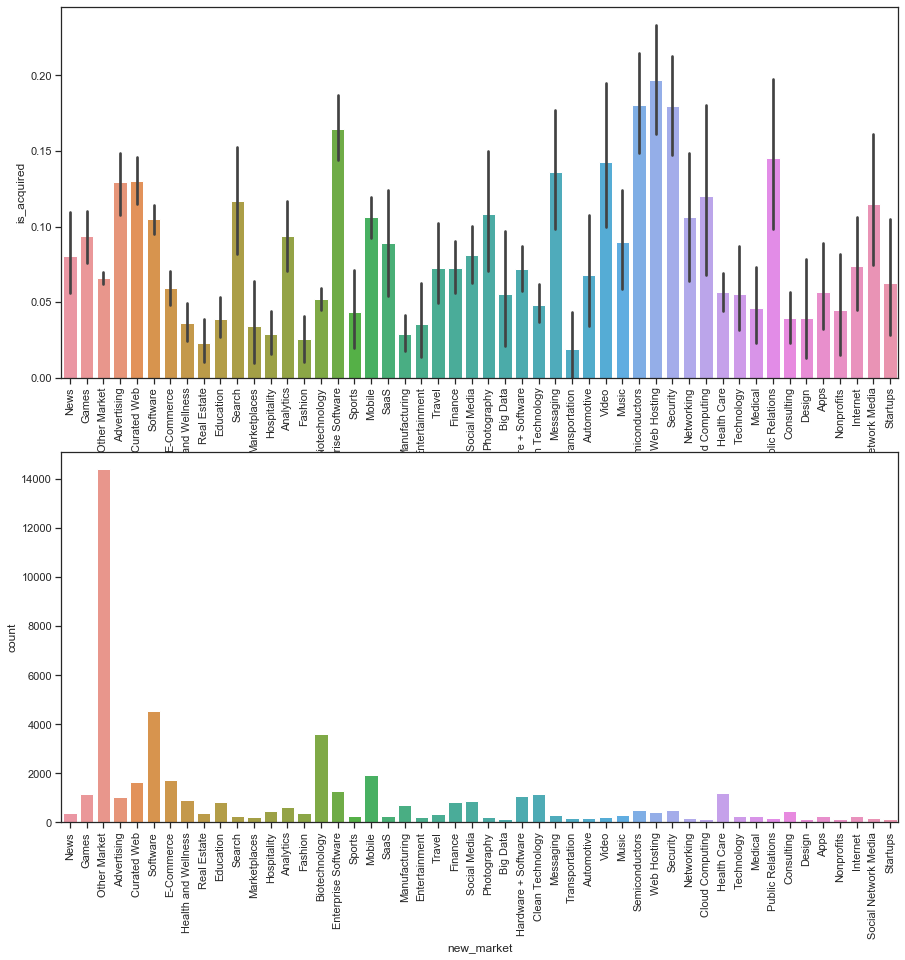

In [583]:
topMarkets = comX['market'].value_counts().sort_values(ascending=False)[:50].index.tolist()

comX['new_market'] = np.where(comX['market'].isin(topMarkets), comX['market'], 'Other Market')
fig, axs = plt.subplots(2, 1, figsize=(15,15))
p1 = sns.barplot(x='new_market', y='is_acquired', data=comX, ax=axs[0])
p2 = sns.countplot(x='new_market', data=comX, ax=axs[1])
for plot in [p1, p2]:
    for item in plot.get_xticklabels():
        item.set_rotation(90)

Based on data shown above we can conclude that companes of certain categories can be acquired with higher probability than others.

In [584]:
new_market_list = comX.groupby(by='new_market').is_acquired.mean().sort_values(ascending=False)[:20].index.tolist()

In [585]:
comX['new_market'] = np.where(comX['new_market'].isin(new_market_list), comX['new_market'], 'Other Market')

In [587]:
market_le = LabelEncoder()
market_labels = market_le.fit_transform(comX['new_market'])
comX['market_label'] = market_labels
# encode labels using one-hot encoding scheme
market_ohe = OneHotEncoder()
market_feature_arr = market_ohe.fit_transform(
                              comX[['market_label']]).toarray()
market_feature_labels = list(market_le.classes_)
market_features = pd.DataFrame(market_feature_arr, 
                            columns=market_feature_labels)
comX.drop('new_market',axis=1,inplace=True)

In [588]:
comX.shape

(48251, 27)

In [589]:
market_features.shape

(48251, 21)

In [590]:
comX.reset_index(drop=True, inplace=True)
market_features.reset_index(drop=True, inplace=True)
comX = pd.concat([comX,market_features],axis=1)
comX.drop('market_label',axis=1,inplace=True)

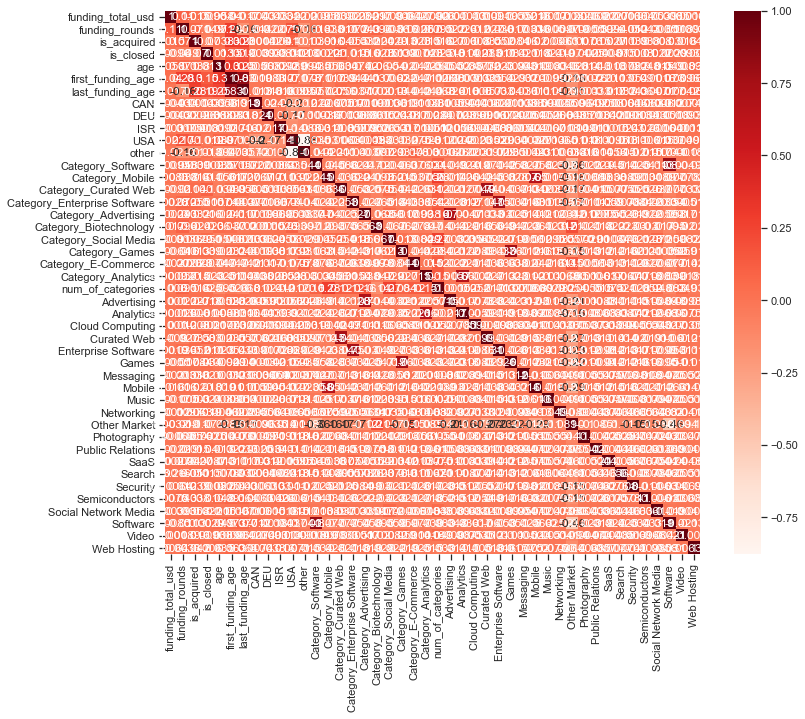

In [592]:
df = comX.drop(['permalink','category_list','market'], axis=1)
# df = pd.concat([df, categories_df], axis=1)

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [596]:
X = comX.drop(['permalink','category_list','market','is_acquired'], axis=1)

In [597]:
y = comX['is_acquired'].copy()

In [598]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['is_acquired'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of not acquired companies in oversampled data",len(os_data_y[os_data_y['is_acquired']==0]))
print("Number of acquired companies",len(os_data_y[os_data_y['is_acquired']==1]))
print("Proportion of not acquired companies in oversampled data is ",len(os_data_y[os_data_y['is_acquired']==0])/len(os_data_X))
print("Proportion of acquired companies in oversampled data is ",len(os_data_y[os_data_y['is_acquired']==1])/len(os_data_X))

length of oversampled data is  62110
Number of no subscription in oversampled data 31055
Number of subscription 31055
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [ ]:
comX.drop(['permalink','category_list','market'], axis=1, inplace=True)

In [600]:
data_final_vars=comX.columns.values.tolist()
y=['is_acquired']
X=[i for i in data_final_vars if i not in y]
logreg = LogisticRegression()
rfe = RFE(logreg, 30)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/Users/lakshayrastogi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/lakshayrastogi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

[False False  True False False False False False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True False  True  True  True  True False
  True  True  True False  True False  True]
[10  4  1  9  6  8 13  3  5  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  2  1 11  1  1  1  1 12  1  1  1 14  1  7  1]


In [603]:
comX.columns

Index(['funding_total_usd', 'funding_rounds', 'is_acquired', 'is_closed',
       'age', 'first_funding_age', 'last_funding_age', 'CAN', 'DEU', 'ISR',
       'USA', 'other', 'Category_Software', 'Category_Mobile',
       'Category_Curated Web', 'Category_Enterprise Software',
       'Category_Advertising', 'Category_Biotechnology',
       'Category_Social Media', 'Category_Games', 'Category_E-Commerce',
       'Category_Analytics', 'num_of_categories', 'Advertising', 'Analytics',
       'Cloud Computing', 'Curated Web', 'Enterprise Software', 'Games',
       'Messaging', 'Mobile', 'Music', 'Networking', 'Other Market',
       'Photography', 'Public Relations', 'SaaS', 'Search', 'Security',
       'Semiconductors', 'Social Network Media', 'Software', 'Video',
       'Web Hosting'],
      dtype='object')

In [604]:
cols = ['is_closed','USA', 'other', 'Category_Software', 'Category_Mobile',
       'Category_Curated Web', 'Category_Enterprise Software',
       'Category_Advertising', 'Category_Biotechnology',
       'Category_Social Media', 'Category_Games', 'Category_E-Commerce',
       'Category_Analytics', 'num_of_categories', 'Advertising', 'Analytics',
       'Cloud Computing', 'Curated Web', 'Enterprise Software', 'Games','Mobile','Networking', 'Other Market',
       'Photography', 'Public Relations','Search', 'Security',
       'Semiconductors','Software','Web Hosting']
X=os_data_X[cols]
y=os_data_y['is_acquired']

In [606]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.491752
         Iterations 21
                                                                         Results: Logit
Model:                                               Logit                                           Pseudo R-squared:                                0.291     
Dependent Variable:                                  is_acquired                                     AIC:                                             61145.4207
Date:                                                2020-03-04 14:07                                BIC:                                             61416.5206
No. Observations:                                    62110                                           Log-Likelihood:                                  -30543.   
Df Model:                                            29                                              LL-Null:                                         -43051.   
Df R

P-values for is_closed, Networking, Photography, Public Relations and Search dictate that these features should be removed.

In [607]:
cols = ['USA', 'other', 'Category_Software', 'Category_Mobile',
       'Category_Curated Web', 'Category_Enterprise Software',
       'Category_Advertising', 'Category_Biotechnology',
       'Category_Social Media', 'Category_Games', 'Category_E-Commerce',
       'Category_Analytics', 'num_of_categories', 'Advertising', 'Analytics',
       'Cloud Computing', 'Curated Web', 'Enterprise Software', 'Games','Mobile', 'Other Market', 'Security',
       'Semiconductors','Software','Web Hosting']
X=os_data_X[cols]
y=os_data_y['is_acquired']

In [608]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [609]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [610]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6730 2496]
 [2208 7199]]


In [611]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      9226
           1       0.74      0.77      0.75      9407

    accuracy                           0.75     18633
   macro avg       0.75      0.75      0.75     18633
weighted avg       0.75      0.75      0.75     18633



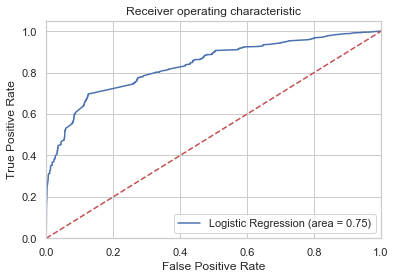

In [612]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## The end. I tried to do some catboost related stuff below but wasn't very successful.

In [247]:
categorical_features_indices = np.array([0])
categorical_features_indices

array([0])

In [248]:
X.dtypes

market                object
funding_total_usd      int64
funding_rounds         int64
is_closed              int64
age                  float64
first_funding_age    float64
last_funding_age     float64
CAN                  float64
CHN                  float64
GBR                  float64
USA                  float64
other                float64
num_of_categories      int64
dtype: object

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

model=CatBoostClassifier(iterations=100, depth=5, learning_rate=0.1, loss_function='CrossEntropy')
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_val, y_val),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6224297	test: 0.6235549	best: 0.6235549 (0)	total: 48ms	remaining: 4.75s
1:	learn: 0.5642897	test: 0.5663453	best: 0.5663453 (1)	total: 61.8ms	remaining: 3.03s
2:	learn: 0.5159003	test: 0.5188168	best: 0.5188168 (2)	total: 80.8ms	remaining: 2.61s
3:	learn: 0.4751496	test: 0.4788124	best: 0.4788124 (3)	total: 95.2ms	remaining: 2.28s
4:	learn: 0.4403822	test: 0.4447461	best: 0.4447461 (4)	total: 111ms	remaining: 2.1s
5:	learn: 0.4105006	test: 0.4154523	best: 0.4154523 (5)	total: 124ms	remaining: 1.94s
6:	learn: 0.3848856	test: 0.3904198	best: 0.3904198 (6)	total: 137ms	remaining: 1.82s
7:	learn: 0.3625644	test: 0.3686749	best: 0.3686749 (7)	total: 151ms	remaining: 1.73s
8:	learn: 0.3429858	test: 0.3496327	best: 0.3496327 (8)	total: 166ms	remaining: 1.68s
9:	learn: 0.3261448	test: 0.3333187	best: 0.3333187 (9)	total: 180ms	remaining: 1.62s
10:	learn: 0.3115631	test: 0.3192174	best: 0.3192174 (10)	total: 193ms	remaining: 1.56s
11:	learn: 0.2984306	test: 0.3065094	best: 0.306509

In [261]:
prediction = model.predict(X_test)
print("accuracy: ", model.score(X_test, y_test))
print(f1_score(y_test, prediction))

recall = (y_test & prediction).sum() / y_test.sum()
precision = (y_test & prediction).sum() / prediction.sum()
print("recall: ", recall)
print("precision: ", precision)

accuracy:  0.9276828158187519
0.15783274440518258
recall:  0.09396914446002805
precision:  0.49264705882352944


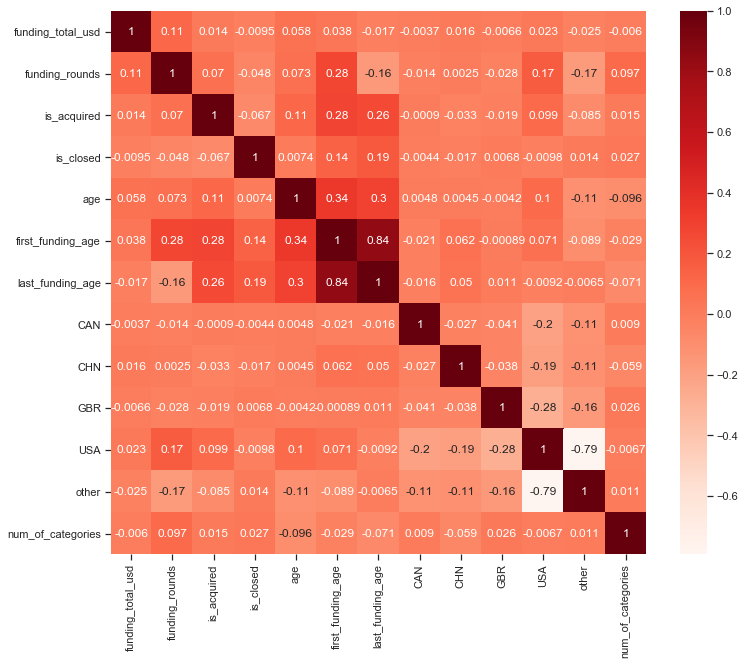

In [265]:
df = comX.drop(['permalink','category_list'], axis=1)
# df = pd.concat([df, categories_df], axis=1)

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

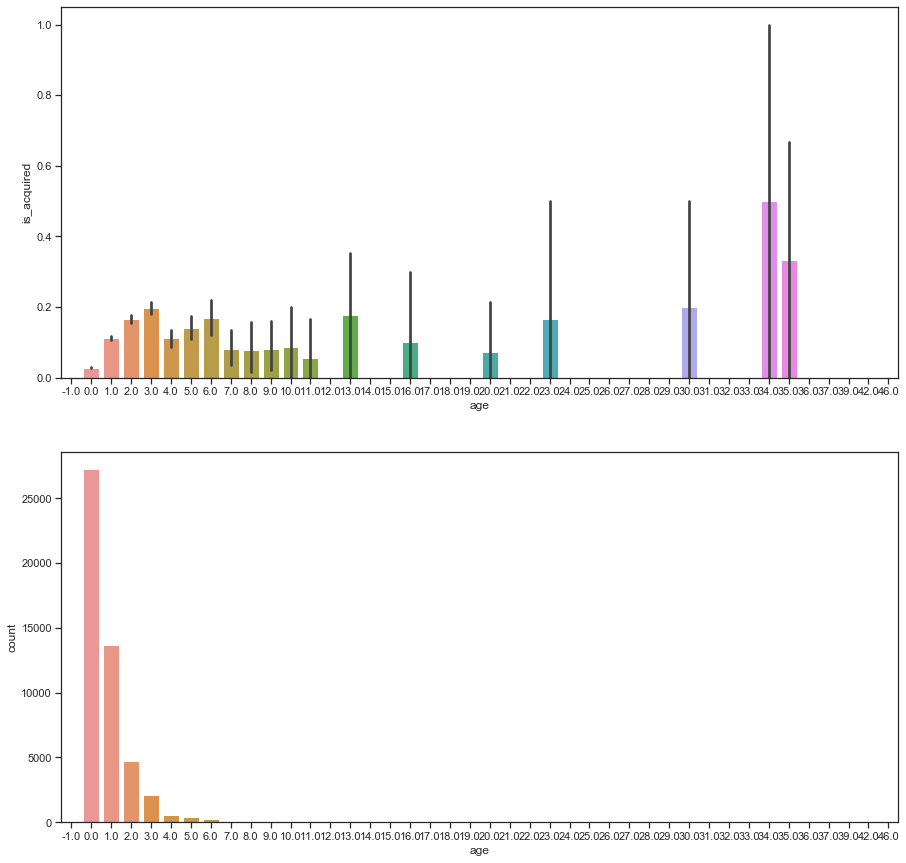

In [286]:
age_acquisition = pd.DataFrame({'age': comX.age.apply(lambda x: x // (365 * 5))})
age_acquisition['is_acquired'] = comX.is_acquired
fig, axs = plt.subplots(2, 1, figsize=(15,15))
sns.barplot(x='age', y='is_acquired', data=age_acquisition, ax=axs[0])
sns.countplot(x='age', data=age_acquisition[age_acquisition['age'].notnull()], ax=axs[1])

In [287]:
comX['acquired_companies'] = 0
for index, row in comX.iterrows():
    row['acquired_companies'] = acquisitions[acquisitions['acquirer_permalink'] == row['permalink']].shape[0]

In [288]:
comX['acquired_companies'].value_counts()

0    49434
Name: acquired_companies, dtype: int64